In [3]:
!pip install scikeras --upgrade  # Ensure scikeras is up-to-date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier  # Import KerasClassifier from scikeras

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd
aa=pd.read_csv('gdrive/My Drive/glass_data.csv')

In [6]:
aa.describe

<bound method NDFrame.describe of       id       ri     na    mg    al     si     k    ca    ba   fe  type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 11 columns]>

In [7]:
aa.shape

(214, 11)

In [8]:
aa.isnull().sum()

,0
id,0
ri,0
na,0
mg,0
al,0
si,0
k,0
ca,0
ba,0
fe,0


In [9]:
unique_values = aa['type'].unique()
unique_values

array([1, 2, 3, 5, 6, 7])

In [10]:
aa['id'].unique()
aa.drop(columns=['id'], errors='ignore')

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


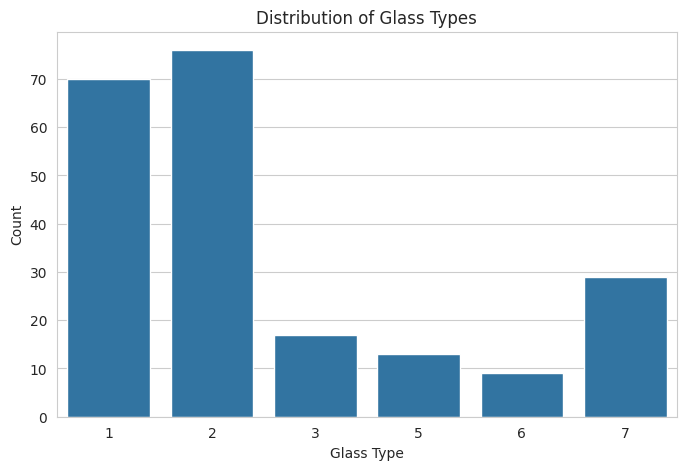

In [11]:
#checking distribution (uneven distribution?)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=aa)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

In [12]:
#checking duplicated values
aa.duplicated().sum()

0

<ipython-input-13-053b0d9dc67a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=aa, x='type', y='ri', palette='coolwarm')


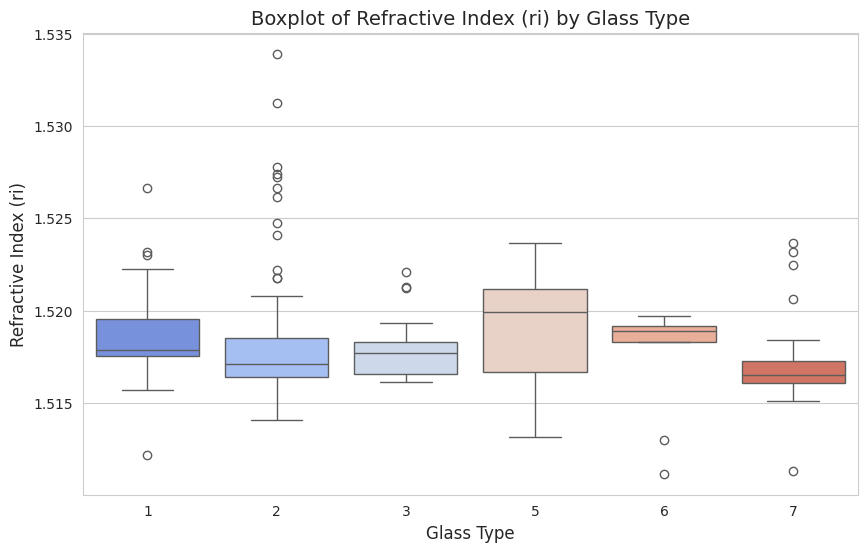

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'ri' feature grouped by the glass 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=aa, x='type', y='ri', palette='coolwarm')

# Add titles and labels
plt.title('Boxplot of Refractive Index (ri) by Glass Type', fontsize=14)
plt.xlabel('Glass Type', fontsize=12)
plt.ylabel('Refractive Index (ri)', fontsize=12)

plt.show()


In [14]:
# Split features and target variable
X = aa.drop('type', axis=1)
y = aa['type']

In [15]:
X.shape,y.shape

((214, 10), (214,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 10), (54, 10), (160,), (54,))

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_resampled = scale.fit_transform(X_train_resampled)
X_test = scale.transform(X_test)


In [19]:
print("Class distribution in the resampled training set:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution in the resampled training set:
type
1    56
7    56
2    56
5    56
6    56
3    56
Name: count, dtype: int64


<ipython-input-20-2aed29ace640>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


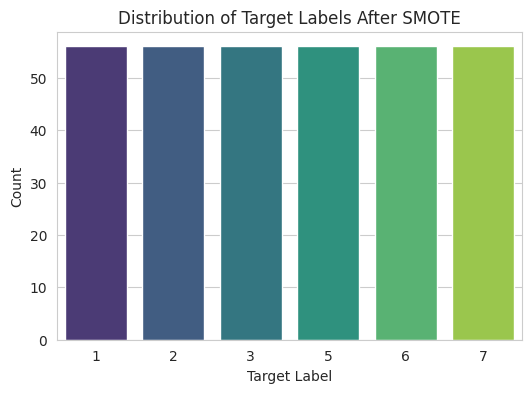

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Distribution of Target Labels After SMOTE')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.show()

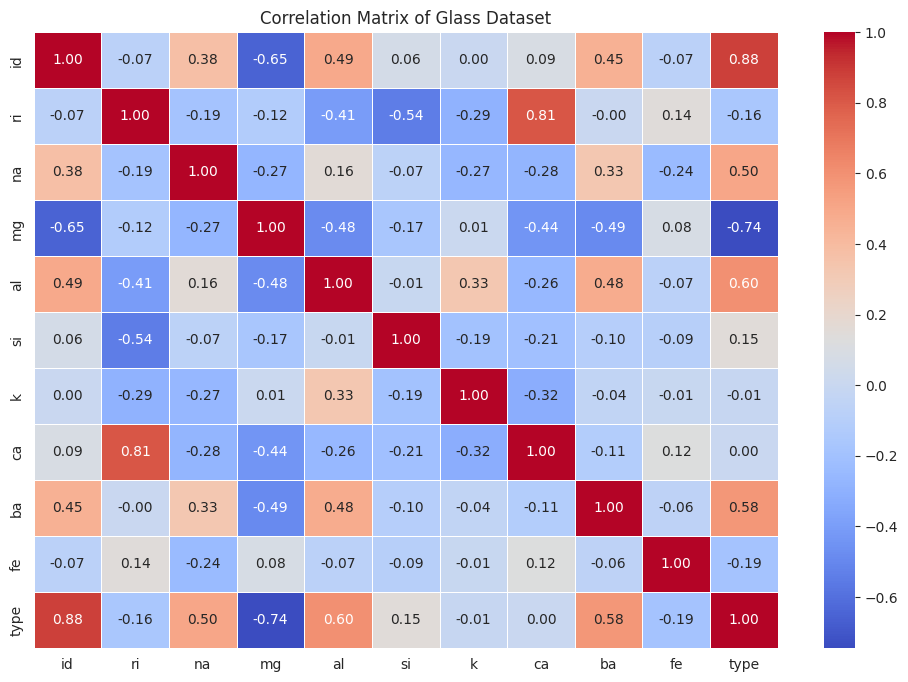

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = aa.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Glass Dataset")
plt.show()

In [22]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train_resampled = encoder.fit_transform(y_train_resampled)
y_test = encoder.transform(y_test)


In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
   # Input layer with more neurons
    Dense(32, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.2),

   #Hidden layers
    Dense(16, activation='relu'),
    Dropout(0.2),

   # Output layer
    Dense(len(np.unique(y)), activation='softmax')


])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer=Adam(learning_rate=0.003),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, y_test)
)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.2805 - loss: 1.8718 - val_accuracy: 0.5000 - val_loss: 1.5305
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3921 - loss: 1.4363 - val_accuracy: 0.5741 - val_loss: 1.3797
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6298 - loss: 1.2378 - val_accuracy: 0.6852 - val_loss: 1.2050
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6811 - loss: 1.0670 - val_accuracy: 0.7407 - val_loss: 0.9797
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7383 - loss: 0.8959 - val_accuracy: 0.7407 - val_loss: 0.8215
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7972 - loss: 0.7097 - val_accuracy: 0.7037 - val_loss: 0.6761
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8147 - loss: 0.6079 - val_accuracy: 0.8333 - val_loss: 0.5660
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8171 - loss: 0.5316 - val_accuracy: 0.8519 - val_l

In [28]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = np.argmax(model.predict(X_test), axis=-1)  # Convert softmax outputs to class labels

# Print the classification report
print(classification_report(y_test, y_pred))



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.89      1.00      0.94         8

    accuracy                           0.98        54
   macro avg       0.98      0.94      0.96        54
weighted avg       0.98      0.98      0.98        54



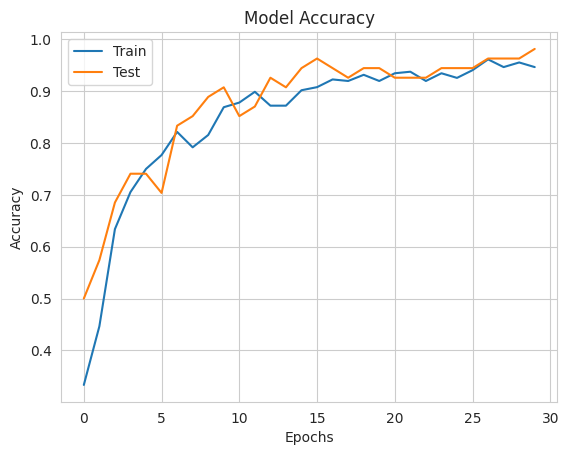

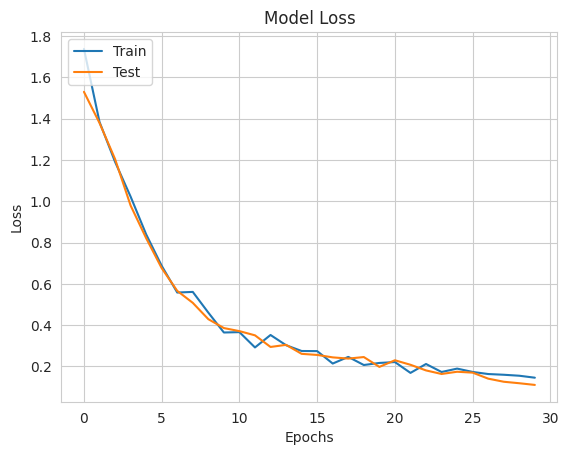

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [36]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred.flatten())})
print(results[:10])

   Actual  Predicted
0       0          0
1       5          5
2       0          0
3       5          5
4       1          1
5       1          1
6       0          0
7       1          1
8       1          1
9       1          1


In [37]:
# Initialize early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [38]:
!pip install scikeras --upgrade
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Function to create the Keras model (modified to accept parameters directly)
def create_model(optimizer='adam', neurons=64, dropout_rate=0.3, **kwargs):
    # **kwargs is added to handle extra parameters if any
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons//2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y_train_resampled)), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model to use in RandomizedSearchCV
model = KerasClassifier(model=create_model, verbose=0)  # 'model' instead of 'build_fn'

# Define hyperparameter grid to search (remove batch_size and epochs)
param_dist = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__neurons': [32, 64, 128],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],  # Batch sizes to try
    'epochs': [10, 20, 50]  # Number of epochs to try
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=1, random_state=42)

# Run the search on the resampled training data
random_search_result = random_search.fit(X_train_resampled, y_train_resampled,
                                         validation_data=(X_test, y_test), callbacks=[early_stopping])

# Print the best hyperparameters found
print("Best Hyperparameters Found: ", random_search_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Hyperparameters Found:  {'model__optimizer': 'adam', 'model__neurons': 128, 'model__dropout_rate': 0.3, 'epochs': 50, 'batch_size': 32}


In [39]:
print("Best Hyperparameters Found: ", random_search_result.best_params_)

Best Hyperparameters Found:  {'model__optimizer': 'adam', 'model__neurons': 128, 'model__dropout_rate': 0.3, 'epochs': 50, 'batch_size': 32}


In [40]:
# Get the best model (KerasClassifier wrapper) from the RandomizedSearchCV result
best_model = random_search_result.best_estimator_

# Get the underlying Keras model using the model_ attribute
keras_model = best_model.model_

# Evaluate the model on the test data
loss, accuracy = keras_model.evaluate(X_test, y_test)
print(f'Final Model Accuracy on Test Set: {accuracy:.4f}')

# Make predictions on training data
y_train_pred = np.argmax(keras_model.predict(X_train_resampled), axis=-1)

# Make predictions on test data
y_test_pred = np.argmax(keras_model.predict(X_test), axis=-1)

# Print classification report for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train_resampled, y_train_pred))

# Print classification report for test data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

# Calculate and print accuracies
train_accuracy = np.mean(y_train_pred == y_train_resampled)
test_accuracy = np.mean(y_test_pred == y_test)

print("\nAccuracy Comparison:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9421 - loss: 0.1357 
Final Model Accuracy on Test Set: 0.9444
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        56

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336


Classification Report - Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        21
           2       0.80  